In [52]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization,Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers, regularizers
from tensorflow.keras.regularizers import l2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
# Definindo os caminhos para os conjuntos de dados
caminhoTreino = "/kaggle/input/chest-xray-pneumonia/chest_xray/train/"
caminhoTeste = "/kaggle/input/chest-xray-pneumonia/chest_xray/test/"
caminhoProducao = "/kaggle/input/chest-xray-pneumonia/chest_xray/val/"

In [54]:
# Configurando os geradores de dados
gerador_treino = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2, # Transformação de cisalhamento
    zoom_range=0.2, # Intervalo de zoom aleatório
    horizontal_flip=True
    )

gerador_teste = ImageDataGenerator(rescale=1./255,)

dados_treino = gerador_treino.flow_from_directory(
    caminhoTreino,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

dados_teste = gerador_teste.flow_from_directory(
    caminhoTeste,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [55]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5, 5), activation='relu', input_shape=(224, 224, 3)),
     tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (4, 4), activation='relu'),
     tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(3, 3),
    
    tf.keras.layers.Conv2D(128, (4, 4), activation='relu'),
     tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu',kernel_regularizer=l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),
    
    
    tf.keras.layers.Flatten(),   

    tf.keras.layers.Dense(512, activation='relu',kernel_regularizer=l2(0.01)), 
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    
    tf.keras.layers.Dense(1, activation='sigmoid')
    

])



In [56]:
modelo.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
               loss='binary_crossentropy',
               metrics=['accuracy'])


In [57]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
# Definindo o callback EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)


In [58]:
# arquitetura da rede
print(modelo.summary())

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_48 (Conv2D)              │ (None, 220, 220, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_48          │ (None, 220, 220, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_48 (MaxPooling2D) │ (None, 110, 110, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 107, 107, 64)   │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_49          │ (None, 107, 107, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_49 (MaxPooling2D) │ (None, 35, 35, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 32, 32, 128)    │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_50          │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_50 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_51          │ (None, 14, 14, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_51 (MaxPooling2D) │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,919,489 (26.40 MB)

 Trainable params: 6,918,529 (26.39 MB)

 Non-trainable params: 960 (3.75 KB)

None


In [59]:

# Treinando o modelo
historicoAprendizado = modelo.fit(dados_treino, epochs=150, validation_data=dados_teste, callbacks=[reduce_lr,early_stopping])

Epoch 1/150
163/163 ━━━━━━━━━━━━━━━━━━━━ 102s 560ms/step - accuracy: 0.8025 - loss: 9.0023 - val_accuracy: 0.6250 - val_loss: 5.0791 - learning_rate: 0.0010
Epoch 2/150
163/163 ━━━━━━━━━━━━━━━━━━━━ 94s 551ms/step - accuracy: 0.8741 - loss: 0.7242 - val_accuracy: 0.6250 - val_loss: 2.8970 - learning_rate: 0.0010
Epoch 3/150
163/163 ━━━━━━━━━━━━━━━━━━━━ 93s 550ms/step - accuracy: 0.8877 - loss: 0.4950 - val_accuracy: 0.6250 - val_loss: 3.9040 - learning_rate: 0.0010
Epoch 4/150
163/163 ━━━━━━━━━━━━━━━━━━━━ 93s 544ms/step - accuracy: 0.8989 - loss: 0.4173 - val_accuracy: 0.6234 - val_loss: 0.8919 - learning_rate: 0.0010
Epoch 5/150
163/163 ━━━━━━━━━━━━━━━━━━━━ 94s 550ms/step - accuracy: 0.9002 - loss: 0.3914 - val_accuracy: 0.6939 - val_loss: 0.6244 - learning_rate: 0.0010
Epoch 6/150
163/163 ━━━━━━━━━━━━━━━━━━━━ 93s 546ms/step - accuracy: 0.9100 - loss: 0.3637 - val_accuracy: 0.8125 - val_loss: 0.6004 - learning_rate: 0.0010
Epoch 7/150
163/163 ━━━━━━━━━━━━━━━━━━━━ 92s 544ms/step - accur

In [69]:
# Visualizando o histórico de aprendizado
historico_df = pd.DataFrame(historicoAprendizado.history)


# Calculando a diferença de perda entre treinamento e validação
diferenca_perda = historico_df['loss'] - historico_df['val_loss']



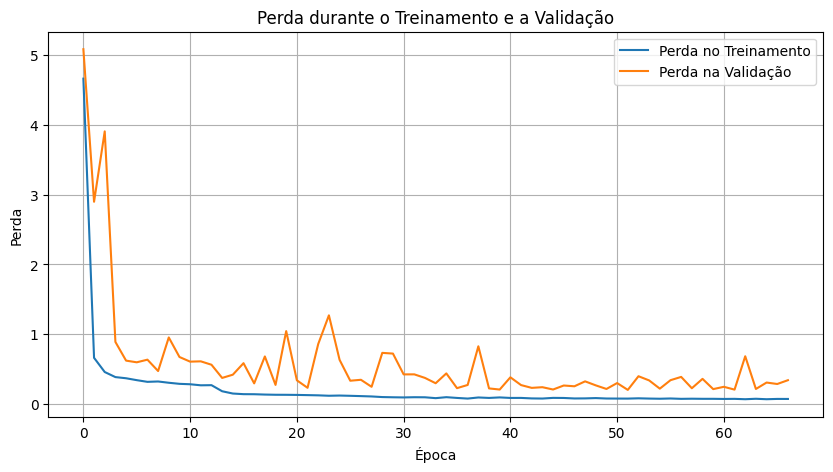

In [74]:
# Plotando a perda ao longo das épocas
plt.figure(figsize=(10, 5))
plt.plot(historico_df['loss'], label='Perda no Treinamento')
plt.plot(historico_df['val_loss'], label='Perda na Validação')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.title('Perda durante o Treinamento e a Validação')
plt.legend()
plt.grid(True)
plt.show()

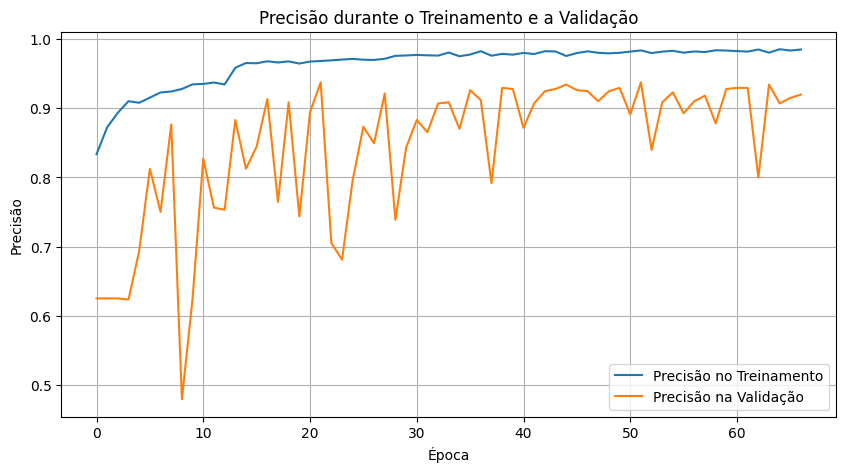

In [75]:
# Plotando a precisão ao longo das épocas
plt.figure(figsize=(10, 5))
plt.plot(historico_df['accuracy'], label='Precisão no Treinamento')
plt.plot(historico_df['val_accuracy'], label='Precisão na Validação')
plt.xlabel('Época')
plt.ylabel('Precisão')
plt.title('Precisão durante o Treinamento e a Validação')
plt.legend()
plt.grid(True)
plt.show()

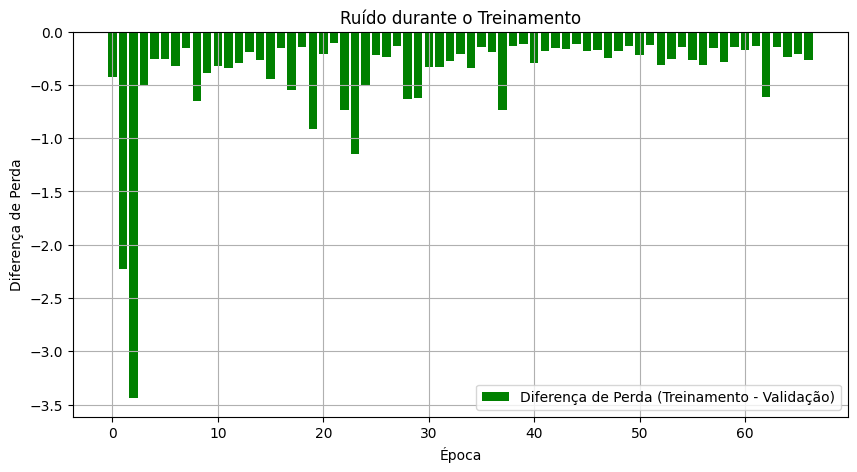

In [76]:
# Plotando a diferença de perda ao longo das épocas
plt.figure(figsize=(10, 5))
plt.bar(historico_df.index, diferenca_perda, color='green', label='Diferença de Perda (Treinamento - Validação)')
plt.xlabel('Época')
plt.ylabel('Diferença de Perda')
plt.title('Ruído durante o Treinamento')
plt.legend()
plt.grid(True)
plt.show()

In [65]:
# Avaliando a precisão do modelo
precisao = modelo.evaluate(dados_teste)[1]
print(f"A precisão do modelo é: {precisao * 100:.2f}%")

20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 225ms/step - accuracy: 0.9422 - loss: 0.2147
A precisão do modelo é: 0.9375


In [80]:
# Testando o modelo com uma imagem de exemplo
caminho_imagem = "/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg"
imagem_teste = load_img(caminho_imagem, target_size=(224, 224))
imagem_array = img_to_array(imagem_teste)
imagem_array = np.expand_dims(imagem_array, axis=0)
imagem_array /= 255.0

# Fazendo previsão com o modelo
previsao = modelo.predict(imagem_array)

# Imprimindo a previsão
classe = "doente" if previsao[0][0] > 0.5 else "normal"
print(f"A imagem é classificada como '{classe}'.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
A imagem é classificada como 'doente'.
